In [1]:
import sys
# add the code path
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

## Example to train Yolo for object detection

In [3]:
from ultrayolo import YoloV3, callbacks
from ultrayolo import datasets
from pathlib import Path
import tensorflow as tf
from ultrayolo import losses
import matplotlib.pyplot as plt

Define the parameters for the run

In [4]:
image_shape = (256,256,3)
batch_shape = 2
max_objects = 100
train_dataset_path = '../tests/data/manifest.txt'
anchors = datasets.load_anchors('../tests/data/yolov3_anchors.txt')
classes = datasets.load_classes('../tests/data/classes.txt')

Create the model

In [5]:
model = YoloV3(image_shape, max_objects, 
               anchors=anchors, num_classes=len(classes), 
               training=True, backbone='MobileNetV2', base_grid_size=64)

num pooling 1


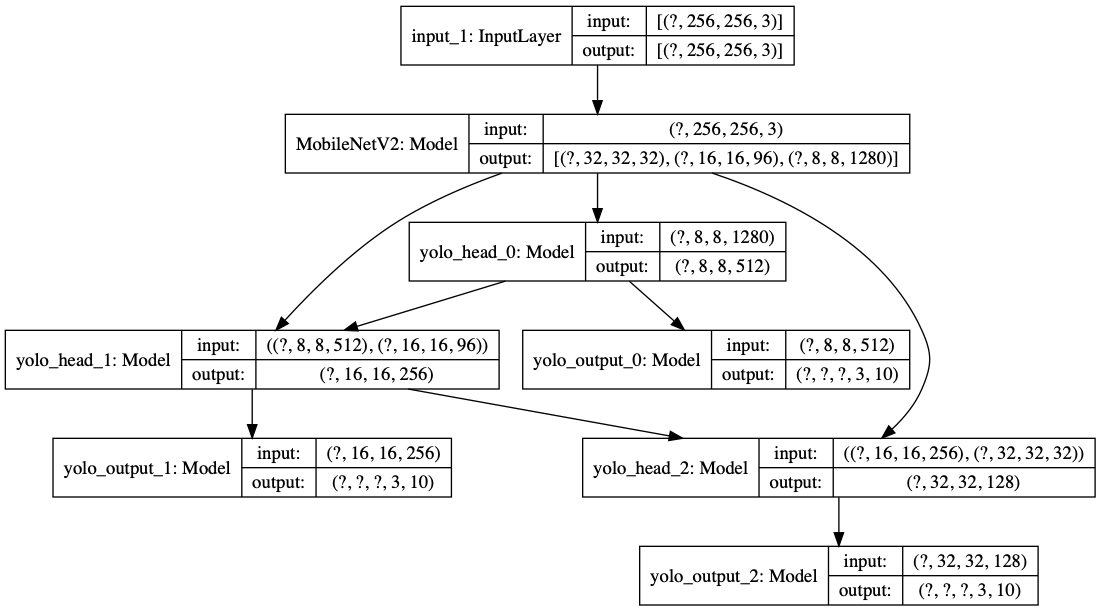

In [6]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

Create the dataset

In [7]:
train_dataset = datasets.YoloDatasetMultiFile(
    train_dataset_path, image_shape, max_objects, batch_shape, 
    model.anchors, model.masks, 64
)

In [8]:
print('num batches', len(train_dataset))

num batches 2


Make optimizer and loss

In [9]:
optimizer = model.get_optimizer('adam', 1e-4)
model_loss = model.get_loss_function(num_batches = len(train_dataset))

  9596 MainThread using adam optimize


In [10]:
model_loss

[yolo_loss_large at 0x165978110,
 yolo_loss_medium at 0x165911550,
 yolo_loss_small at 0x1659a82d0]

compile the model

In [11]:
model.compile(optimizer, model_loss, run_eagerly=True, summary=False)

Create the callbacks

In [12]:
model_callbacks = callbacks.default_callbacks(model,
    run_path='./checkpoints', lrate_mode='exp_range',
    lrate_value=1e-5, verbose=0)

Set the model in transfer mode

In [13]:
model.set_mode_transfer()

  9895 MainThread freeze backbone


In [14]:
history = model.fit(train_dataset, train_dataset, 5, callbacks=model_callbacks)

  9974 MainThread training for 5 epochs on the dataset /Users/fumarolaf/git/ultrayolo/notebooks/../tests/data


Train for 2 steps, validate for 2 steps
Epoch 1/5
2/2 [==============================] - 8s 4s/step - loss: 1606.3602 - yolo_output_0_loss: 83.3973 - yolo_output_1_loss: 307.9103 - yolo_output_2_loss: 1130.5004 - val_loss: 1491.7465 - val_yolo_output_0_loss: 76.3384 - val_yolo_output_1_loss: 266.1987 - val_yolo_output_2_loss: 1064.6580
Epoch 2/5
2/2 [==============================] - 5s 3s/step - loss: 1580.7247 - yolo_output_0_loss: 77.1867 - yolo_output_1_loss: 300.3980 - yolo_output_2_loss: 1118.5891 - val_loss: 1491.7280 - val_yolo_output_0_loss: 76.3367 - val_yolo_output_1_loss: 266.2234 - val_yolo_output_2_loss: 1064.6182
Epoch 3/5
2/2 [==============================] - 5s 2s/step - loss: 1557.1224 - yolo_output_0_loss: 72.4101 - yolo_output_1_loss: 294.3926 - yolo_output_2_loss: 1105.7705 - val_loss: 1491.6611 - val_yolo_output_0_loss: 76.3197 - val_yolo_output_1_loss: 266.2427 - val_yolo_output_2_loss: 1064.5510
Epoch 4/5
2/2 [==============================] - 5s 2s/step - loss

## Evaluate model Loss

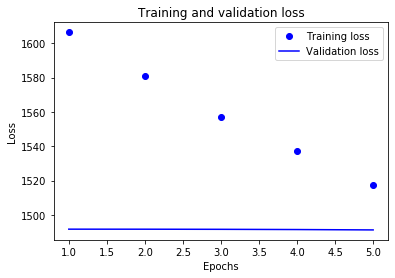

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for large-sized objects

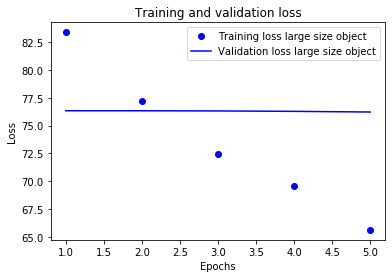

In [16]:
loss = history.history['yolo_output_0_loss']
val_loss = history.history['val_yolo_output_0_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss large size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss large size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for medium-sized objects

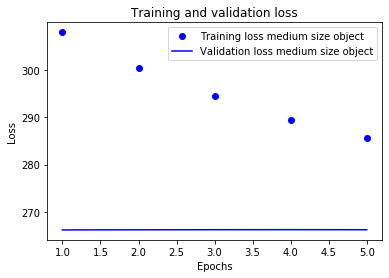

In [17]:
loss = history.history['yolo_output_1_loss']
val_loss = history.history['val_yolo_output_1_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss medium size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss medium size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for small-sized objects

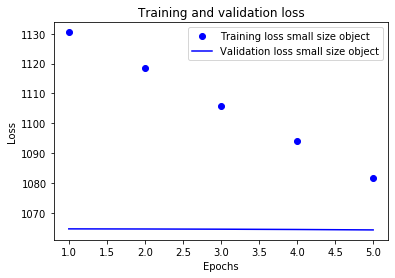

In [18]:
loss = history.history['yolo_output_2_loss']
val_loss = history.history['val_yolo_output_2_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss small size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss small size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()